# boston house prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Lets load the boston house pricing dataset1

In [50]:
dataset = pd.read_csv('HousingData.csv')

In [51]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [52]:
dataset.rename(columns = {'MEDV':'Price'},inplace = True)

In [53]:
dataset.sample()

CRIM   ZN  INDUS  CHAS    NOX     RM  AGE     DIS  RAD  TAX  PTRATIO  \
316  0.31827  0.0    9.9   0.0  0.544  5.914  NaN  3.9986    4  304     18.4   

         B  LSTAT  Price  
316  390.7  18.33   17.8

In [54]:
dataset.shape

(506, 14)

In [55]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [56]:
dataset['RAD'] = dataset['RAD'].astype('float')
dataset['TAX'] = dataset['TAX'].astype('float')

In [57]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [58]:
dataset.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [59]:
dataset.isnull().sum().sum()

np.int64(120)

In [60]:
dataset.duplicated().sum()

np.int64(0)

In [61]:
dataset.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
Price      229
dtype: int64

In [62]:
dataset.Price.value_counts(ascending= False).head()

Price
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
Name: count, dtype: int64

In [63]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [64]:
dataset['CRIM'].fillna(dataset['CRIM'].mean(),inplace = True)
dataset['ZN'].fillna(dataset['ZN'].mean(),inplace = True)
dataset['INDUS'].fillna(dataset['INDUS'].mean(),inplace = True)
dataset['CHAS'].fillna(dataset['CHAS'].mean(),inplace = True)
dataset['AGE'].fillna(dataset['AGE'].mean(),inplace = True)
dataset['LSTAT'].fillna(dataset['LSTAT'].mean(),inplace = True)

In [65]:
dataset.isnull().sum().sum()

np.int64(0)

# Explorative data analysis

In [66]:
# correlation
correlation = dataset.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       -0.370163  0.167431 

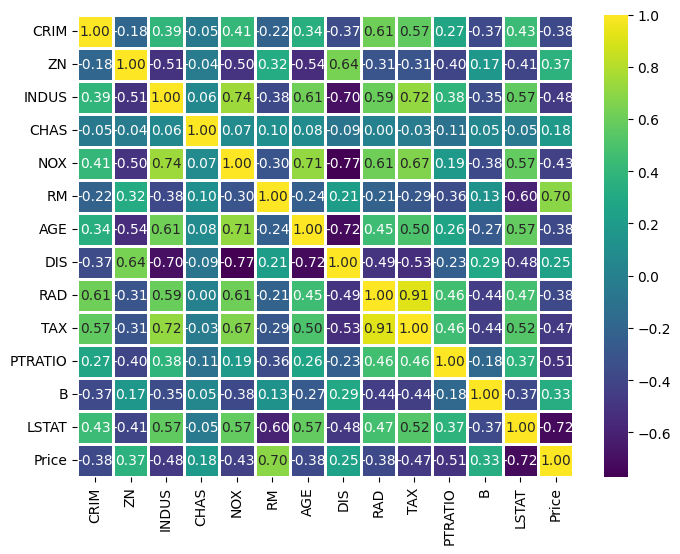

In [67]:
import seaborn as sns

plt.figure(figsize= (8,6))
sns.heatmap(correlation,annot = True,fmt = '.2f',cmap = 'viridis',linewidth= 0.9)
plt.show()

In [68]:
corr_abs = correlation.abs()
corr_abs

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000  0.182930  0.391161  0.052223  0.410377  0.215434  0.344934   
ZN       0.182930  1.000000  0.513336  0.036147  0.502287  0.316550  0.541274   
INDUS    0.391161  0.513336  1.000000  0.058035  0.740965  0.381457  0.614592   
CHAS     0.052223  0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377  0.502287  0.740965  0.073286  1.000000  0.302188  0.711461   
RM       0.215434  0.316550  0.381457  0.102284  0.302188  1.000000  0.241351   
AGE      0.344934  0.541274  0.614592  0.075206  0.711461  0.241351  1.000000   
DIS      0.366523  0.638388  0.699639  0.091680  0.769230  0.205246  0.724353   
RAD      0.608886  0.306316  0.593176  0.001425  0.611441  0.209847  0.449989   
TAX      0.566528  0.308334  0.716062  0.031483  0.668023  0.292048  0.500589   
PTRATIO  0.273384  0.403085  0.384806  0.109310  0.188933  0.355501  0.262723   
B        0.370163  0.167431  0.354597  0.050055  0.380051  0.128069  0.265282   
LSTAT    0.434044  0.407549  0.567354  0.046166  0.572379  0.602962  0.574893   
Price    0.379695  0.365943  0.478657  0.179882  0.427321  0.695360  0.380223   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM     0.366523  0.608886  0.566528  0.273384  0.370163  0.434044  0.379695  
ZN       0.638388  0.306316  0.308334  0.403085  0.167431  0.407549  0.365943  
INDUS    0.699639  0.593176  0.716062  0.384806  0.354597  0.567354  0.478657  
CHAS     0.091680  0.001425  0.031483  0.109310  0.050055  0.046166  0.179882  
NOX      0.769230  0.611441  0.668023  0.188933  0.380051  0.572379  0.427321  
RM       0.205246  0.209847  0.292048  0.355501  0.128069  0.602962  0.695360  
AGE      0.724353  0.449989  0.500589  0.262723  0.265282  0.574893  0.380223  
DIS      1.000000  0.494588  0.534432  0.232471  0.291512  0.483429  0.249929  
RAD      0.494588  1.000000  0.910228  0.464741  0.444413  0.468440  0.381626  
TAX      0.534432  0.910228  1.000000  0.460853  0.441808  0.524545  0.468536  
PTRATIO  0.232471  0.464741  0.460853  1.000000  0.177383  0.373343  0.507787  
B        0.291512  0.444413  0.441808  0.177383  1.000000  0.368886  0.333461  
LSTAT    0.483429  0.468440  0.524545  0.373343  0.368886  1.000000  0.721975  
Price    0.249929  0.381626  0.468536  0.507787  0.333461  0.721975  1.000000

In [69]:
sns.pairplot(dataset)

In [70]:
sns.scatterplot(x = dataset['CRIM'],y = dataset['Price'],color = 'red')

<Axes: xlabel='CRIM', ylabel='Price'>

<Axes: xlabel='RM', ylabel='Price'>

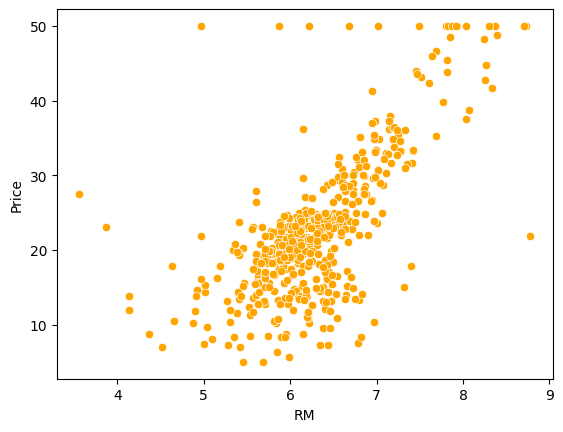

In [71]:
sns.scatterplot(x = dataset['RM'],y= dataset['Price'],color = 'orange')

<Axes: xlabel='RM', ylabel='Price'>

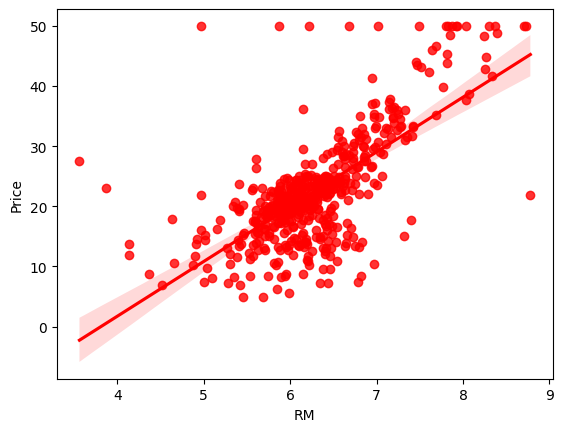

In [72]:
sns.regplot(x = "RM",y = "Price",data = dataset,color = 'red')

<Axes: xlabel='LSTAT', ylabel='Price'>

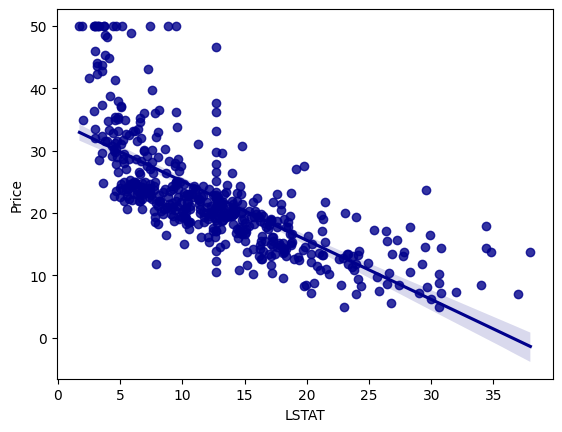

In [73]:
sns.regplot(x = 'LSTAT',y = 'Price',data = dataset,color = 'darkblue')

In [74]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

<Axes: xlabel='PTRATIO', ylabel='Price'>

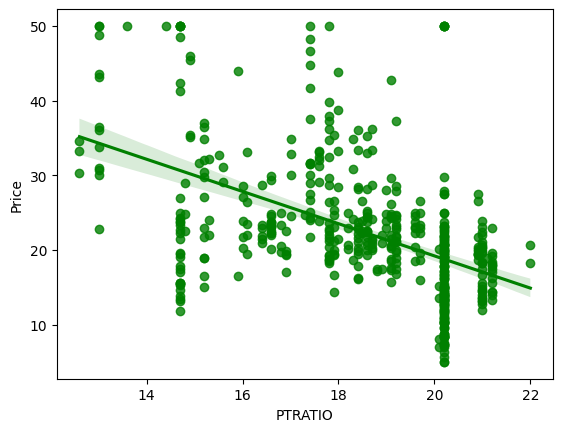

In [75]:
sns.regplot(x = 'PTRATIO',y= 'Price',data = dataset,color = 'green')

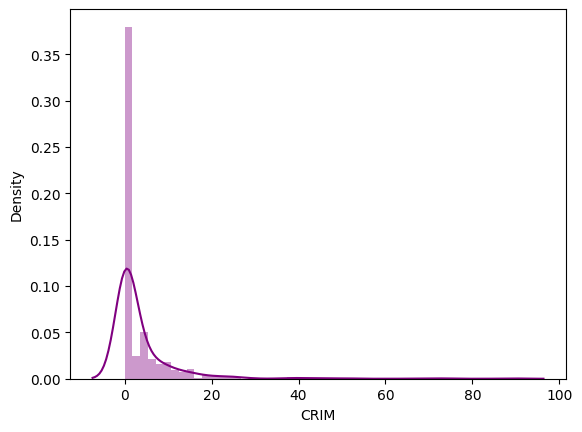

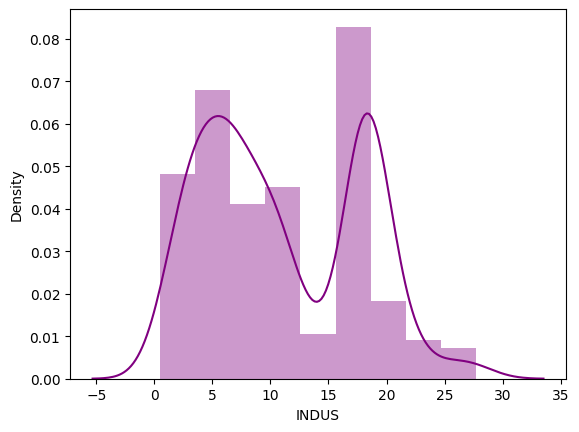

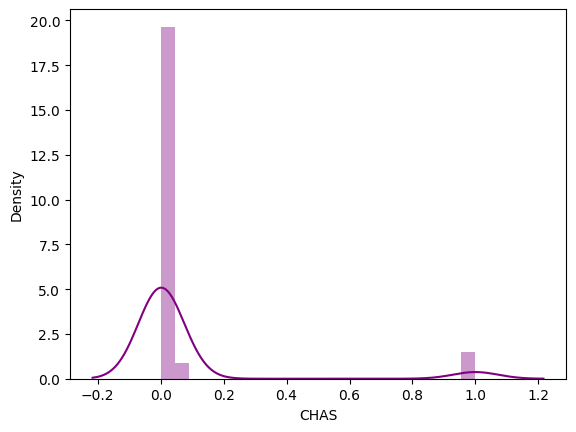

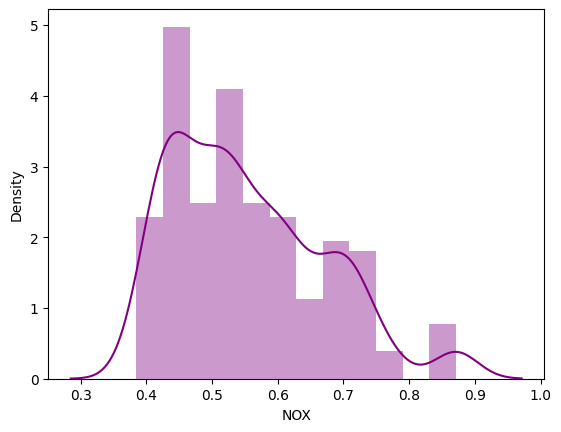

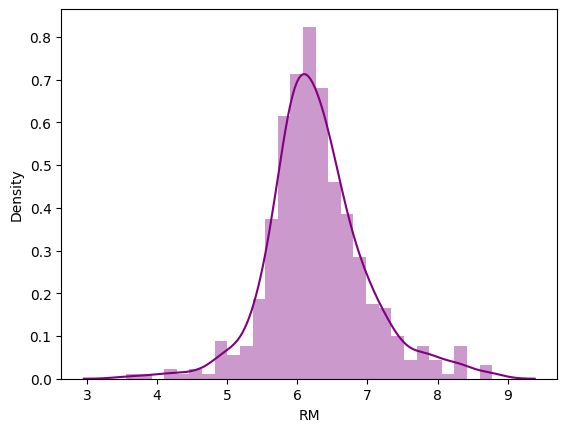

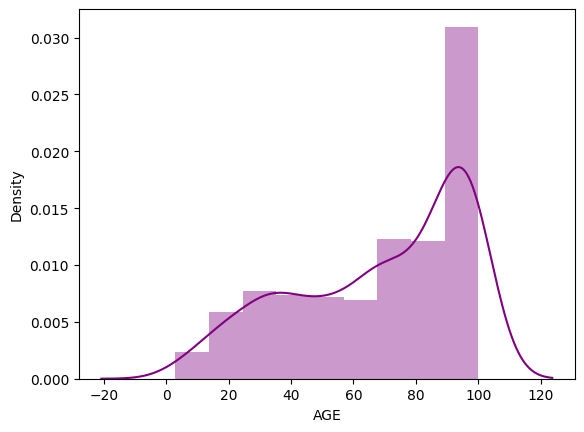

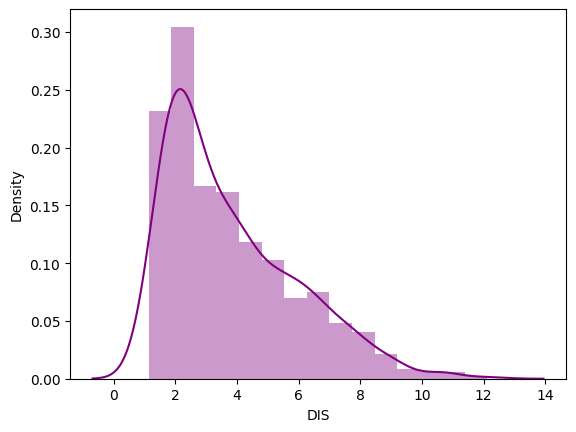

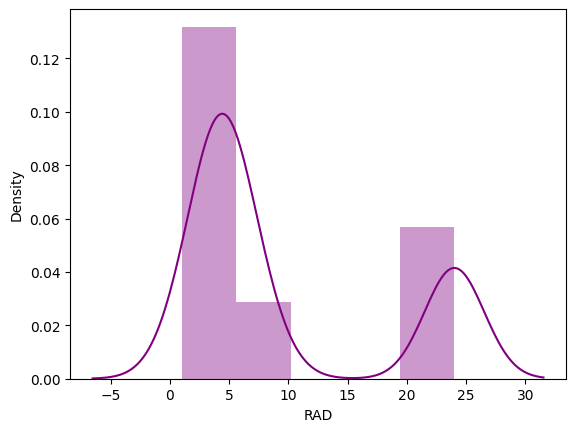

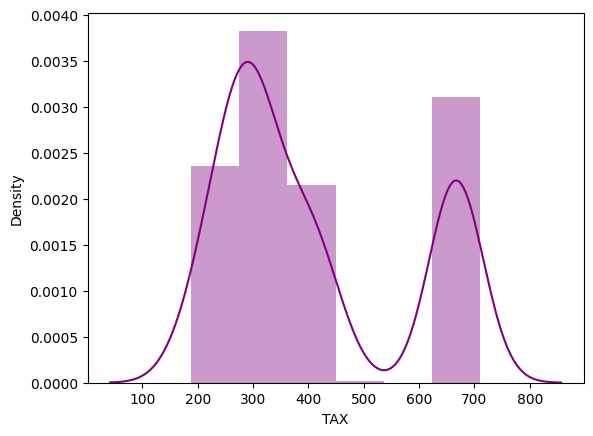

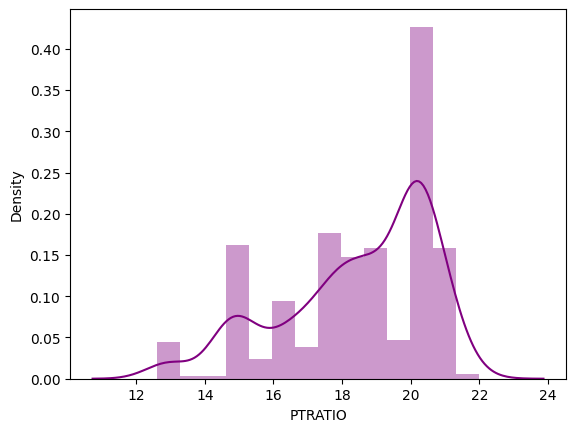

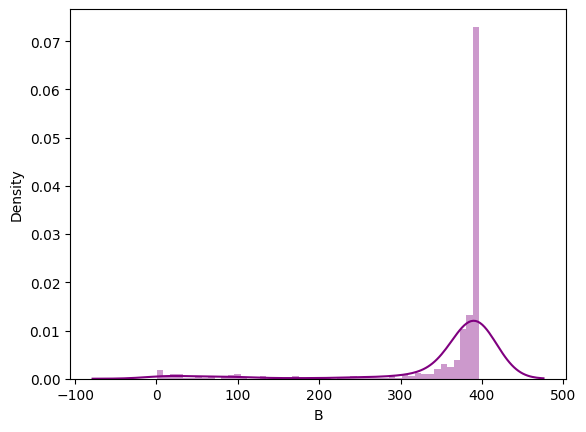

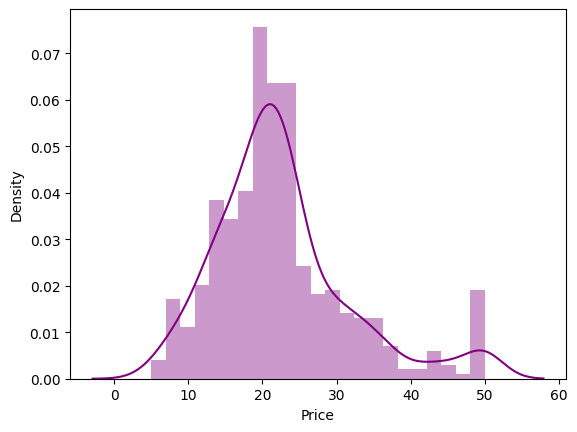

In [76]:
for i in dataset.columns:
    sns.distplot(dataset[i],color = 'purple')
    plt.show()

In [77]:
# Independent and dependent features

X= dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [78]:
print(X.shape,y.shape)

(506, 13) (506,)


# model_selection1

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [80]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [81]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
5     0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622   3.0  222.0   
116   0.13158   0.0  10.01   0.0  0.547  6.176  72.5  2.7301   6.0  432.0   
45    0.17142   0.0   6.91   0.0  0.448  5.682  33.8  5.1004   3.0  233.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935  29.3  4.4986   4.0  307.0   
468  15.57570   0.0  18.10   0.0  0.580  5.926  71.0  2.9084  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
106   0.17120   0.0   8.56   0.0  0.520  5.836  91.9  2.2110   5.0  384.0   
270   0.29916  20.0   6.96   0.0  0.464  5.856  42.1  4.4290   3.0  223.0   
348   0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440   4.0  280.0   
435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
102   0.22876   0.0   8.56   0.0  0.520  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B      LSTAT  
5       18.7  394.12   5.210000  
116     17.8  393.30  12.715432  
45      17.9  396.90  10.210000  
16      21.0  386.85   6.580000  
468     20.2  368.74  18.130000  
..       ...     ...        ...  
106     20.9  395.67  18.660000  
270     18.6  388.65  13.000000  
348     17.0  390.94   5.990000  
435     20.2  109.85  23.270000  
102     20.9   70.80  10.630000  

[354 rows x 13 columns]

In [82]:
X_test.head()

CRIM    ZN      INDUS  CHAS    NOX     RM        AGE     DIS   RAD  \
173  0.09178   0.0  11.083992   0.0  0.510  6.416  68.518519  2.6463   5.0   
274  0.05644  40.0   6.410000   1.0  0.447  6.758  32.900000  4.0776   4.0   
491  0.10574   0.0  27.740000   0.0  0.609  5.983  98.800000  1.8681   4.0   
72   0.09164   0.0  10.810000   0.0  0.413  6.065   7.800000  5.2873   4.0   
452  5.09017   0.0  18.100000   0.0  0.713  6.297  91.800000  2.3682  24.0   

       TAX  PTRATIO       B  LSTAT  
173  296.0     16.6  395.50   9.04  
274  254.0     17.6  396.90   3.53  
491  711.0     20.1  390.11  18.07  
72   305.0     19.2  390.91   5.52  
452  666.0     20.2  385.09  17.27

In [83]:
y_train.head()

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: Price, dtype: float64

In [84]:
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64

# datapreprocessing 

# scaling

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# why we to standardscaling because internally we do gradient descent in linear regression
# so we want a global minima so we need to make every feature on same unit 
# show that gradient descent hapend easy snapped  computation

In [120]:
X_train_scale  = scaler.fit_transform(X_train)

In [121]:
X_test_scale = scaler.transform(X_test)

In [122]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [125]:
pickled_scaled = pickle.load(open('scaling.pkl','rb'))

In [126]:
pickled_scaled

StandardScaler()

In [88]:
X_train_scale

array([[-0.42002854, -0.51161896, -1.31729854, ...,  0.18727079,
         0.39651419, -1.04595325],
       [-0.4076886 , -0.51161896, -0.15405495, ..., -0.21208981,
         0.3870674 ,  0.03449941],
       [-0.40285597, -0.51161896, -0.61459839, ..., -0.16771641,
         0.42854113, -0.3261728 ],
       ...,
       [-0.42182865,  3.06664934, -1.34255415, ..., -0.56707702,
         0.35987906, -0.9336675 ],
       [ 0.93011786, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.87841346,  1.55389374],
       [-0.39590057, -0.51161896, -0.36947043, ...,  1.16348561,
        -3.32828832, -0.26571124]], shape=(354, 13))

In [89]:
X_test_scale

array([[-0.41251638, -0.51161896,  0.00549984, ..., -0.74457062,
         0.41241246, -0.49460143],
       [-0.41680315,  1.27751519, -0.68887959, ..., -0.30083661,
         0.42854113, -1.28779948],
       [-0.41082301, -0.51161896,  2.47995639, ...,  0.8084984 ,
         0.35031705,  0.80532207],
       ...,
       [-0.35973226, -0.51161896, -0.7200777 , ..., -0.38958342,
         0.25688594, -1.12944778],
       [ 0.25333977, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.98970133,  0.5390033 ],
       [ 0.78024446, -0.51161896,  1.04781486, ...,  0.8528718 ,
         0.33199949,  0.57067364]], shape=(152, 13))

In [90]:
from sklearn.linear_model import LinearRegression


In [91]:
regression = LinearRegression()
regression

LinearRegression()

In [92]:
regression.fit(X_train_scale,y_train)

LinearRegression()

In [93]:
# print the coefficiens and the intercept
print(regression.coef_)

[-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]


In [94]:
print(regression.intercept_)

23.01581920903955


In [95]:
# on which paramters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [96]:
regression.n_features_in_

13

In [97]:
regression.n_jobs

In [98]:
# Prediction with Test Data
reg_pred  = regression.predict(X_test_scale)
reg_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

# plot a scatter plot for the prediction


<Axes: xlabel='Price'>

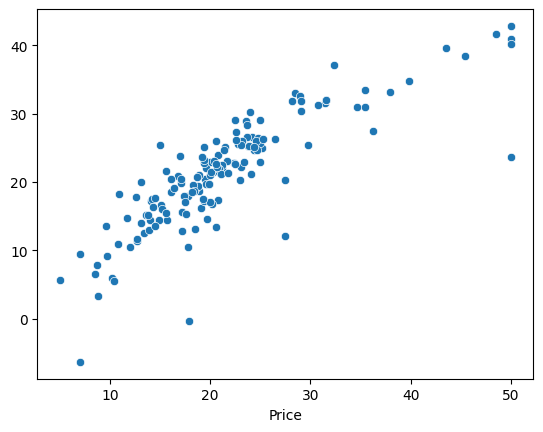

In [99]:
sns.scatterplot(y = reg_pred,x = y_test)

In [100]:
# residual means basically errors
residuals = y_test-reg_pred

In [101]:
residuals

173   -5.346842
274   -4.680947
491   -1.563343
72    -2.799770
452   -2.420504
         ...   
441   -3.386594
23     0.905782
225    9.774023
433   -2.093079
447   -5.269098
Name: Price, Length: 152, dtype: float64

In [102]:
# plotting this residuals

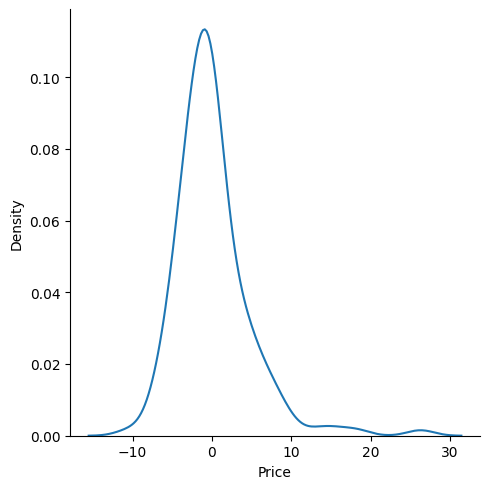

In [103]:
sns.displot(residuals, kind= "kde")

# Assumption1

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1410525671084684
21.818457953526053
4.671023223398279


# using more performance merics
# R_sqaure and adjusted_R_square

In [105]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)

In [106]:
score

0.7071862632031753

# adjusted r Squared

In [107]:
1 - (1-score)*(len(y_test)-1)/(len(y_test) -X_test.shape[1]-1)

0.6796023604614455

In [108]:
dataset.iloc[0].values # it return numpy array of first row


array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00, 2.400e+01])

In [109]:
# it is not transformed
# i need to drop last column
boston = dataset.iloc[:,:-1]
boston.sample()

CRIM    ZN      INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
344  0.03049  55.0  11.083992   0.0  0.484  6.874  28.1  6.4654  5.0  370.0   

     PTRATIO       B  LSTAT  
344     17.6  387.97   4.61

In [110]:
boston.shape

(506, 13)

# New Data Prediction

In [111]:
 # make Prediction
user_input = boston.iloc[22].values # this is not scaled 

# input_data_as_numpy = np.asarray(user_input)

# input_data_reshape  = user_input.reshape(1,-1)

prediction = regression.predict(scaler.transform(user_input.reshape(1,-1)))
                                


In [112]:
print(prediction)

[15.97922002]


# Pickling the model file for deployment

In [113]:
import pickle

In [114]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [115]:
pickled_model = pickle.load(open('/home/aryan-45/Documents/all window data/mjune/endtoend_project/regmodel.pkl','rb'))

In [116]:
pickled_model

LinearRegression()

In [117]:
pickled_model.predict(scaler.transform(boston.iloc[32].values.reshape(1,-1)))

array([9.15888735])

In [118]:
pickled_model.predict(scaler.transform(boston.iloc[0].values.reshape(1, -1)))


array([30.2586963])